In [281]:
import pandas as pd
import numpy as np

In [282]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [283]:
df.shape

(5572, 5)

In [284]:
#steps
#Data cleaning
#EDA
# text preprocessing
#model building
#evaluation of model
#improvments
#website
#deploy


## Data cleaning


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [287]:
#drop last 3 coloumn 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [288]:
#renaming the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3990,ham,I am on the way to ur home
4186,ham,Dear got bus directly to calicut
4373,ham,K and you're sure I don't have to have consent...
365,ham,Well i know Z will take care of me. So no worr...
4953,ham,U coming back 4 dinner rite? Dad ask me so i r...


In [289]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [290]:
df['target'] = encoder.fit_transform(df['target'])

In [291]:
df.sample()

,target,text
3842,0,Yes ammae....life takes lot of turns you can o...


In [292]:
#check missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [293]:
#check for duplicate values
df.duplicated().sum()

403

In [294]:
#remove the duplicated values
df = df.drop_duplicates(keep='first')

In [295]:
df.duplicated().sum()

0

# EDA


In [297]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [298]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

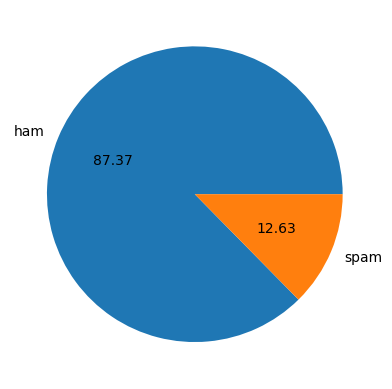

In [299]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [300]:
#data is inbalanced
import nltk

In [301]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [302]:
df['num_characters']=df['text'].apply(len)  # calculating the no of characters used

C:\Users\srima\AppData\Local\Temp\ipykernel_16532\3913306613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)  # calculating the no of characters used


In [303]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [304]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [316]:
# fetch the no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\srima\AppData\Local\Temp\ipykernel_16532\873881543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
